In [1]:
!pip install EMD-signal
!pip install vnstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 938.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import PyEMD as pe
from vnstock import *

Observations:  1634
            Open  High   Low  Close  Volume Ticker
Time                                              
2017-06-02  3410  3440  3290   3320    2580    VIB
2017-06-05  3320  3410  3290   3290   39900    VIB
2017-06-06  3310  3320  3290   3320   53340    VIB
2017-06-07  3420  3420  3310   3340   69855    VIB
2017-06-08  3310  3310  3290   3310   50310    VIB
2017-06-09  3290  3310  3290   3290   43100    VIB


<Axes: xlabel='Time'>

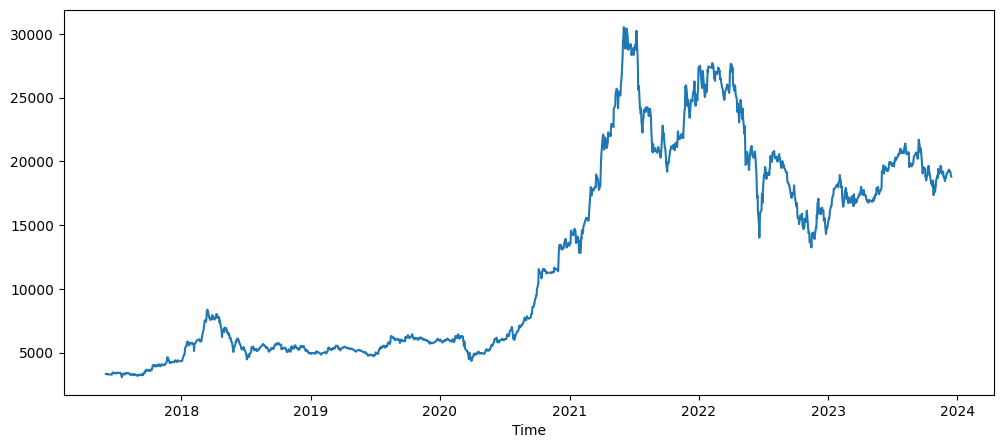

In [3]:
# Import data
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
print(pd.DataFrame(VIB.head(6)))
train_dates = VIB.index
plt.figure(figsize=(12, 5))
VIB["Close"].plot()

In [5]:
VIB = VIB.reset_index(drop = True)
df = VIB['Close']
df

0        3320
1        3290
2        3320
3        3340
4        3310
        ...  
1629    19200
1630    19200
1631    19050
1632    18900
1633    18800
Name: Close, Length: 1634, dtype: int64

In [6]:
## (A) CEEMDAN
#### 1. Thêm white noise vào chuỗi gốc s(t) thành chuỗi s1(t)
#### 2. Decompose chuỗi s1(t) bằng EMD ra các chuỗi IMF1 và Residue1
#### 3. Trung bình các chuỗi IMF1(t) thành mIMF1(t)
#### 4. r1(t) = s1(t) - mIMF1(t)
#### 5. Chuỗi mới s2(t) = r1(t) + coef*EMD(noise)
#### 6. Làm lại từ 1->5 đến khi chuỗi residue dừng

In [7]:
from PyEMD import EMD, CEEMDAN

In [8]:
ceemdan = CEEMDAN(range_thr=0.001, total_power_thr=0.01)
cIMFs = ceemdan.ceemdan(S=np.array(df.values), T= np.array(df.index))

In [9]:
pd.DataFrame(cIMFs.T, columns = ["IMF"+str(i+1) for i in range(cIMFs.shape[0])])

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7,IMF8
0,7.373254,-1.109295,16.069458,-47.164578,25.611305,-21.843637,386.527992,2954.535502
1,-18.489280,-5.561105,19.740119,-50.833344,26.317080,-22.271493,387.330134,2953.767889
2,-7.352482,12.613859,23.234897,-54.111486,27.199112,-22.925291,388.319627,2953.021763
3,20.427876,6.397192,23.578715,-56.660799,28.271698,-23.809397,389.497553,2952.297162
4,-8.035126,10.492826,18.564586,-58.099121,29.545653,-24.927807,390.864854,2951.594137
...,...,...,...,...,...,...,...,...
1629,-57.331757,132.156201,317.576820,-240.512209,-806.755169,3152.495441,-4455.780161,21158.150834
1630,48.085357,75.208736,275.631062,-257.552051,-789.326957,3148.902739,-4450.843739,21149.894851
1631,15.412533,19.260373,214.743451,-266.335258,-773.950887,3145.000963,-4445.702426,21141.571250
1632,-28.812062,-22.691734,145.955121,-267.318883,-760.746630,3140.790877,-4440.356698,21133.180010


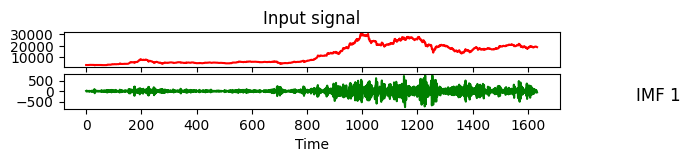

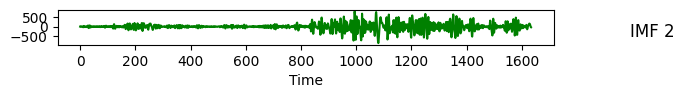

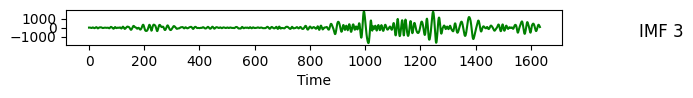

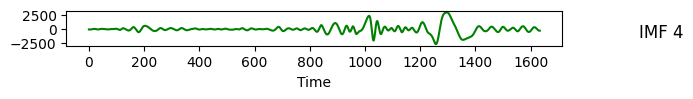

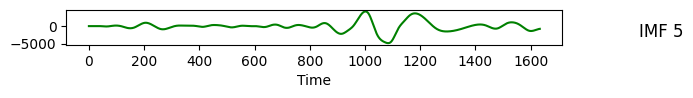

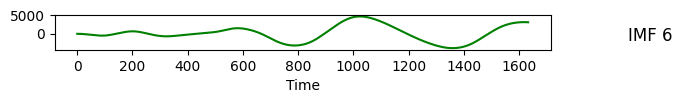

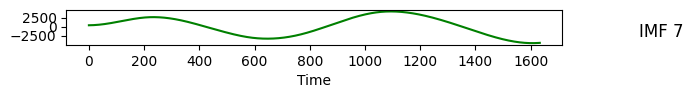

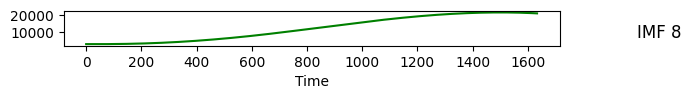

In [10]:
N = cIMFs.shape[0]+1
# Plot results
plt.subplot(N,1,1)
plt.plot(df.index, df.values, 'r')
plt.title("Input signal")
plt.xlabel("Time")

for n, imf in enumerate(cIMFs):
  plt.subplot(N,1,n+2)
  plt.plot(df.index, imf, 'g')
  plt.title("IMF "+str(n+1), x=1.2, y = 0)
  plt.xlabel("Time")
  plt.show()

In [11]:
# Tính residue
scIMF = cIMFs.sum(axis = 0).reshape(-1, 1)
residue = (np.array(df)-cIMFs.sum(axis = 0)).reshape(-1,1)

print("sIMF:", scIMF.shape)
print("Residue:", residue.shape)

sIMF: (1634, 1)
Residue: (1634, 1)


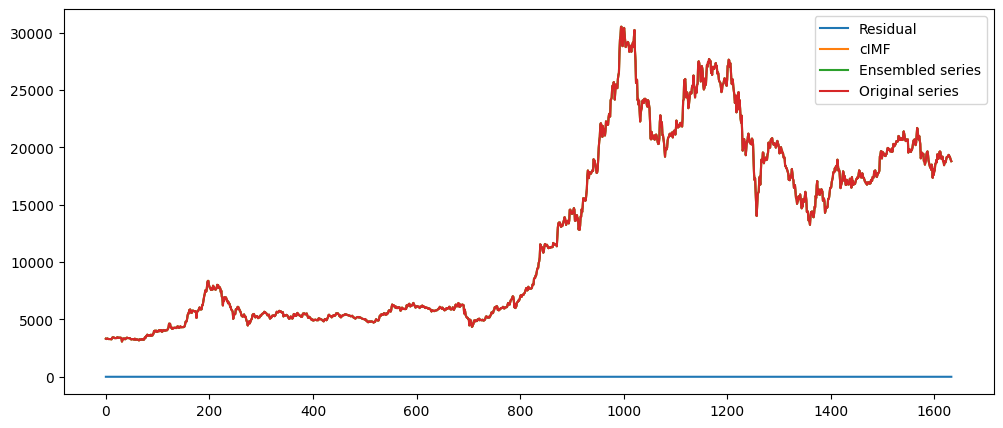

In [12]:
plt.figure(figsize=(12,5))
plt.plot(range(0,len(df)), residue)
plt.plot(range(0,len(df)), scIMF)
plt.plot(range(0,len(df)), scIMF+residue)
plt.plot(df)
plt.legend(["Residual", "cIMF", "Ensembled series", "Original series"])

plt.show()

In [13]:
# (B) LSTM
## 0. Prepocessing

In [14]:
# load các thư viện cần thiết
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler

In [15]:
cIMF = cIMFs.sum(axis = 0).reshape(-1, 1)+residue
cIMF

array([[ 3320.],
       [ 3290.],
       [ 3320.],
       ...,
       [19050.],
       [18900.],
       [18800.]])

In [16]:
# Scale data to 0-1
scaler = StandardScaler()
def Scaling (data):
    IMFscale = scaler.fit_transform(np.array(data))

    return IMFscale
IMFscale = Scaling(cIMF)
#train_scaled = scaler.inverse_transform(train_scaled)
#pd.DataFrame(train_scaled, columns=["IMF"+str(i+1) for i in range(cIMFs.shape[0])])

(1634, 1)
Train:  (1143, 1)
Test:  (491, 1)


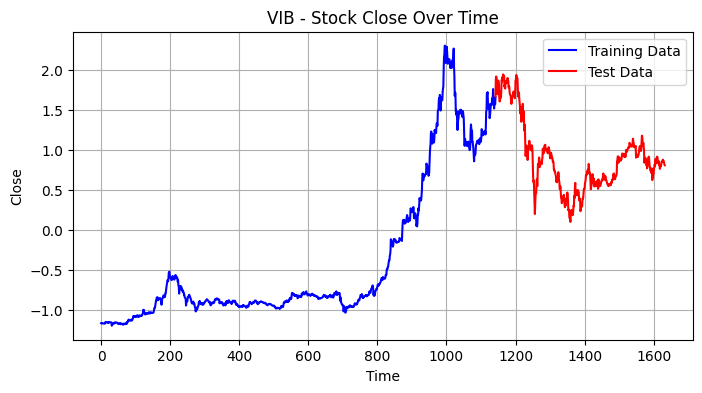

In [17]:
print(IMFscale.shape)
# Chia train test
train_size = int(0.7*IMFscale.shape[0])
test_size = int(0.3*IMFscale.shape[0])
train_data = IMFscale[:train_size].reshape(-1,1)
test_data = IMFscale[train_size:].reshape(-1,1)

print("Train: ", train_data.shape)
print("Test: ", test_data.shape)

# Plotting both training and test data on the same chart
plt.figure(figsize=(8, 4))

plt.plot(range(train_size), train_data, linestyle='-', color='b', label='Training Data')
plt.plot(range(train_size -1,  train_size+test_size), test_data, linestyle='-',  color='r', label='Test Data')


plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
trainX = []
trainY = []

n_past = 14
n_future = 1

for i in range(n_past, len(train_data) - n_future + 1):
    past_sequence = train_data[i - n_past:i, 0:train_data.shape[1]]  # Exclude the first column ("Close") for trainX
    future_sequence = train_data[i + n_future - 1: i + n_future, 0]  # Use the "Close" column for trainY

    trainX.append(past_sequence)
    trainY.append(future_sequence)

trainX, trainY = np.array(trainX), np.array(trainY)
print("X train: ", trainX.shape)
print("Y train: ", trainY.shape)

X train:  (1129, 14, 1)
Y train:  (1129, 1)


In [19]:
testX = []
testY = []

for i in range(n_past, len(test_data) - n_future + 1):
    past_sequence = test_data[i - n_past:i, 0:test_data.shape[1]]  # Exclude the first column ("Close") for trainX
    future_sequence = test_data[i + n_future - 1: i + n_future, 0]  # Use the "Close" column for trainY

    testX.append(past_sequence)
    testY.append(future_sequence)

testX, testY = np.array(testX), np.array(testY)

print("X test: ", testX.shape)
print("Y test: ", testY.shape)

X test:  (477, 14, 1)
Y test:  (477, 1)


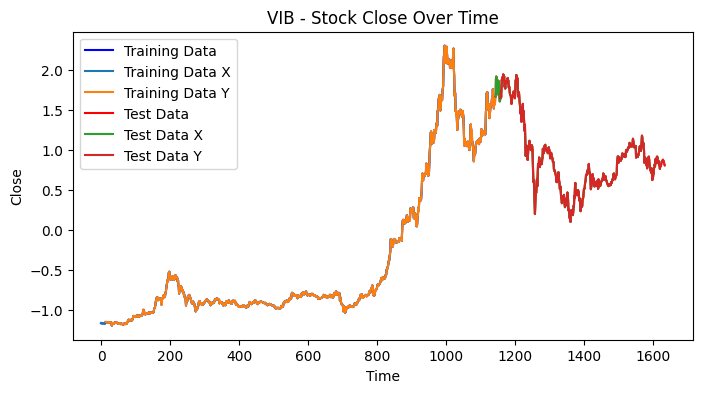

In [22]:
# Plotting both training and test data on the same chart
plt.figure(figsize=(8, 4))

plt.plot(range(train_size), train_data, linestyle='-', color='b', label='Training Data')
plt.plot(range(train_size-14), trainX[:,0,0], linestyle='-', label='Training Data X')
plt.plot(range(14,train_size), trainY[:,0], linestyle='-', label='Training Data Y')
plt.plot(range(train_size, train_size+test_size+1), test_data, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size, train_size+test_size-13), testX[:,0,0], linestyle='-',  label='Test Data X')
plt.plot(range(train_size+14, train_size+test_size+1), testY[:,0], linestyle='-', label='Test Data Y')


plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [21]:
## 1. Train model
# Tạo model lstm cho việc training
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mape')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29345 (114.63 KB)
Trainable params: 29345 (114.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# fit the model
history = model.fit(trainX, trainY, epochs=60, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/60
254/254 [==============================] - 6s 10ms/step - loss: 24.1035 - val_loss: 10.5642
Epoch 2/60
254/254 [==============================] - 4s 17ms/step - loss: 18.5865 - val_loss: 7.5818
Epoch 3/60
254/254 [==============================] - 6s 24ms/step - loss: 17.8331 - val_loss: 10.5516
Epoch 4/60
254/254 [==============================] - 4s 17ms/step - loss: 17.0333 - val_loss: 6.8558
Epoch 5/60
254/254 [==============================] - 4s 17ms/step - loss: 16.4768 - val_loss: 6.4996
Epoch 6/60
254/254 [==============================] - 6s 22ms/step - loss: 15.4069 - val_loss: 8.9431
Epoch 7/60
254/254 [==============================] - 4s 17ms/step - loss: 15.9460 - val_loss: 28.0267
Epoch 8/60
254/254 [==============================] - 2s 8ms/step - loss: 14.9459 - val_loss: 13.9902
Epoch 9/60
254/254 [==============================] - 2s 8ms/step - loss: 15.1074 - val_loss: 6.2738
Epoch 10/60
254/254 [==============================] - 3s 12ms/step - loss: 15.2

In [24]:
prediction = model.predict(testX)
prediction_copies = np.repeat(prediction, train_data.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
print(y_pred_future)

15/15 [==============================] - 1s 7ms/step
[25252.328  25517.318  26350.215  24978.906  27116.654  27381.887
 26689.146  27667.043  27002.582  27933.645  27345.55   27278.586
 27472.443  25717.145  26928.334  25950.205  27531.438  26749.76
 26774.8    26702.982  27149.922  26847.625  27512.45   26669.51
 27147.314  25873.768  26707.33   26237.754  25592.152  25676.828
 25615.857  25564.58   24969.559  24639.904  25082.25   25639.764
 25488.713  25550.762  25989.01   26022.377  25853.691  25650.385
 25584.854  25169.05   26259.744  27754.33   26833.775  27926.666
 27245.342  26598.459  27587.844  26484.402  25421.047  25361.14
 26265.33   25636.75   24958.79   24787.018  24337.428  23617.092
 24497.428  24642.66   22450.797  24147.48   24311.156  23794.684
 25322.557  22558.852  24669.584  23039.12   22270.91   22123.387
 23097.02   20776.297  19539.42   20026.621  21068.695  20839.69
 20047.18   20221.232  19253.754  20037.059  20790.7    20472.547
 21105.615  21336.828  2083

In [25]:
train_back = scaler.inverse_transform(train_data)
test_back = scaler.inverse_transform(test_data)

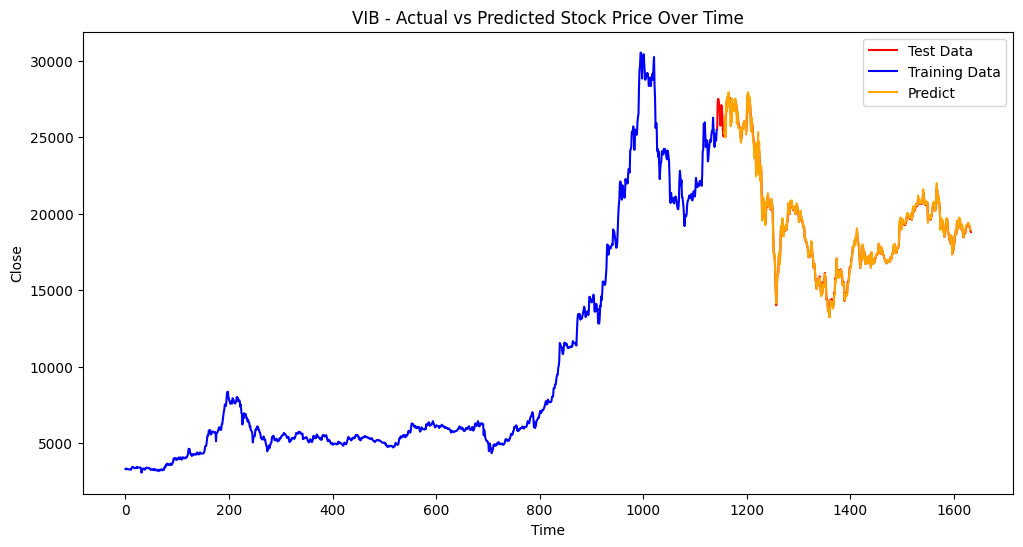

In [26]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_back.reshape(-1,1), linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_back, linestyle='-', color='b', label='Training Data')
#predict_date = Test_data['Time'];
plt.plot(range(train_size+13, train_size+test_size),  y_pred_future, label='Predict', linestyle='-',  color='orange')
# # Plot predicted values
#plt.plot( test_Date, y_pred, label='Predicted', linestyle='-',  color='b')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [27]:
n_past = 1
n_days_for_prediction= 60

#print(test_data.reshape(1,-1).T.shape)

test_for_forecast = test_data.reshape(1,-1).T

x_forecast = []
y_forecast = []

for i in range(n_days_for_prediction):
  # B1 Duyệt dữ liệu test 14 ngày gần nhất => bỏ vào x tạm
  x = np.array(test_for_forecast[-14:])
  print(x.shape)
  x = x.T.reshape(x.shape[1], x.shape[0], 1)
  print(x.shape)

  # B2 dùng predict để chạy 1 ngày
  y = model.predict(x)
  # B3 thêm data ngày đó vào y_forecast, test_for_forecast và append x vào x_forecast
  y_c = np.repeat(y, x.shape[1], axis=-1)
  y_pr = scaler.inverse_transform(y_c)[:,0]

  x_forecast.append(x)
  y_forecast.append(y_pr)
  test_for_forecast = np.append(test_for_forecast, y).reshape(-1,1)
  print(test_for_forecast.shape)
  #test_for_forecast.append(y)
  # B4 lặp lại đến ngày thứ 60

x_forecast = np.array(x_forecast)
y_forecast = np.array(y_forecast)

(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 34ms/step
(492, 1)
(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 32ms/step
(493, 1)
(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 50ms/step
(494, 1)
(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 22ms/step
(495, 1)
(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 22ms/step
(496, 1)
(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 21ms/step
(497, 1)
(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 22ms/step
(498, 1)
(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 25ms/step
(499, 1)
(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 20ms/step
(500, 1)
(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 24ms/step
(501, 1)
(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 23ms/step
(502, 1)
(14, 1)
(1, 14, 1)
1/1 [==============================] - 0s 27ms/step
(503, 1)
(14, 1)
(1, 14, 1)
1/1 [================

In [28]:
print(y_forecast)

[[18845.52 ]
 [18912.395]
 [18987.395]
 [19063.195]
 [19137.36 ]
 [19209.902]
 [19281.592]
 [19353.307]
 [19425.514]
 [19498.656]
 [19572.943]
 [19648.39 ]
 [19724.947]
 [19802.607]
 [19881.357]
 [19961.145]
 [20041.908]
 [20123.572]
 [20206.068]
 [20289.316]
 [20373.24 ]
 [20457.764]
 [20542.803]
 [20628.273]
 [20714.086]
 [20800.154]
 [20886.387]
 [20972.69 ]
 [21058.973]
 [21145.139]
 [21231.096]
 [21316.75 ]
 [21402.004]
 [21486.766]
 [21570.945]
 [21654.451]
 [21737.197]
 [21819.096]
 [21900.062]
 [21980.021]
 [22058.902]
 [22136.627]
 [22213.133]
 [22288.35 ]
 [22362.223]
 [22434.701]
 [22505.732]
 [22575.268]
 [22643.273]
 [22709.713]
 [22774.559]
 [22837.785]
 [22899.371]
 [22959.3  ]
 [23017.566]
 [23074.164]
 [23129.088]
 [23182.34 ]
 [23233.93 ]
 [23283.865]]


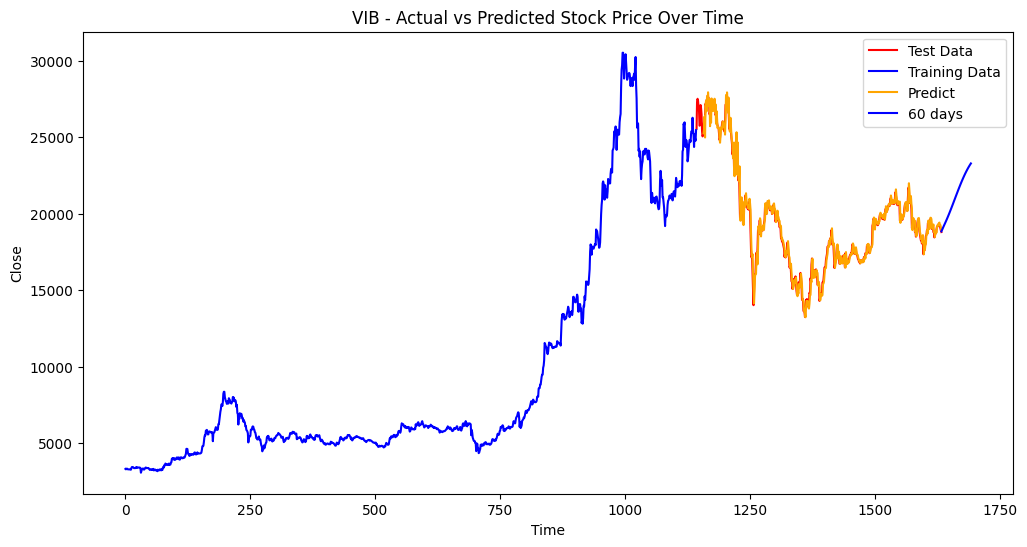

In [29]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_back.reshape(-1,1), linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_back, linestyle='-', color='b', label='Training Data')
# Plot predict test and actual test
plt.plot(range(train_size+14, train_size+test_size+1),  y_pred_future, label='Predict', linestyle='-',  color='orange')
# Plot 60 days
plt.plot(range(train_size+test_size, train_size+test_size+60), y_forecast, linestyle='-', color='b', label='60 days')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [30]:
def RSME (data1, data2):
    return np.sqrt(np.mean((data1-data2)*(data1-data2)))
def MAE (data1, data2):
    return np.mean(np.absolute(data1-data2))
def MAPE (pred, actual):
    return np.mean(np.absolute((pred-actual)/actual))*100

In [31]:
print("RSME: ", RSME(y_pred_future, test_back[-14:]))
print("MAE: ", MAE(y_pred_future, test_back[-14:]))
print("MAPE: ", MAPE(y_pred_future, test_back[-14:]))

RSME:  3322.8004047318664
MAE:  2469.9663204388476
MAPE:  12.979754638463712


In [32]:
def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred_future, test_back[14:]))

MSLR:  0.05310193137250608
